In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.5.0'

In [3]:
# GPU stuff
physical_devices = tf.config.list_physical_devices('GPU')
print('Physical Devices: {}'.format(physical_devices))
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU memory limitated successfuly!')
except:
    print('Warning! GPU memory could not be limitated!')

Physical Devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU memory limitated successfuly!


In [6]:
%ls Data

test/  train/


In [14]:
base_dir = %pwd
data_dir = os.path.join(base_dir, 'Data')
BATCH_SIZE = 16
IMG_SIZE = 256
input_shape = (IMG_SIZE,IMG_SIZE)
seed = 123
# For reproducibility
#np.random.seed(seed)
#train_frac = 0.8
elu_alpha = 1.0

In [15]:
input_shape

(256, 256)

## 0. Load Data

In [16]:
# set images generatos (to load images from disk)
image_gen = ImageDataGenerator(rescale=1./255)

sample_data = image_gen.flow_from_directory(
    directory=os.path.join(data_dir,'train'),
    target_size=input_shape,
    color_mode='rgb', 
    classes=None,
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    seed=seed,
    save_to_dir=None, 
    save_prefix='', 
    save_format='png',
    follow_links=False, 
    subset=None, 
    interpolation='nearest'
)

Found 2856 images belonging to 87 classes.


In [72]:
n_classes = sample_data.num_classes

In [18]:
#generate name-label_number pairs 
class_indices = sample_data.class_indices
class_indices

{'Alexandrite': 0,
 'Almandine': 1,
 'Amazonite': 2,
 'Amber': 3,
 'Amethyst': 4,
 'Ametrine': 5,
 'Andalusite': 6,
 'Andradite': 7,
 'Aquamarine': 8,
 'Aventurine Green': 9,
 'Aventurine Yellow': 10,
 'Benitoite': 11,
 'Beryl Golden': 12,
 'Bixbite': 13,
 'Bloodstone': 14,
 'Blue Lace Agate': 15,
 'Carnelian': 16,
 'Cats Eye': 17,
 'Chalcedony': 18,
 'Chalcedony Blue': 19,
 'Chrome Diopside': 20,
 'Chrysoberyl': 21,
 'Chrysocolla': 22,
 'Chrysoprase': 23,
 'Citrine': 24,
 'Coral': 25,
 'Danburite': 26,
 'Diamond': 27,
 'Diaspore': 28,
 'Dumortierite': 29,
 'Emerald': 30,
 'Fluorite': 31,
 'Garnet Red': 32,
 'Goshenite': 33,
 'Grossular': 34,
 'Hessonite': 35,
 'Hiddenite': 36,
 'Iolite': 37,
 'Jade': 38,
 'Jasper': 39,
 'Kunzite': 40,
 'Kyanite': 41,
 'Labradorite': 42,
 'Lapis Lazuli': 43,
 'Larimar': 44,
 'Malachite': 45,
 'Moonstone': 46,
 'Morganite': 47,
 'Onyx Black': 48,
 'Onyx Green': 49,
 'Onyx Red': 50,
 'Opal': 51,
 'Pearl': 52,
 'Peridot': 53,
 'Prehnite': 54,
 'Pyrite': 5

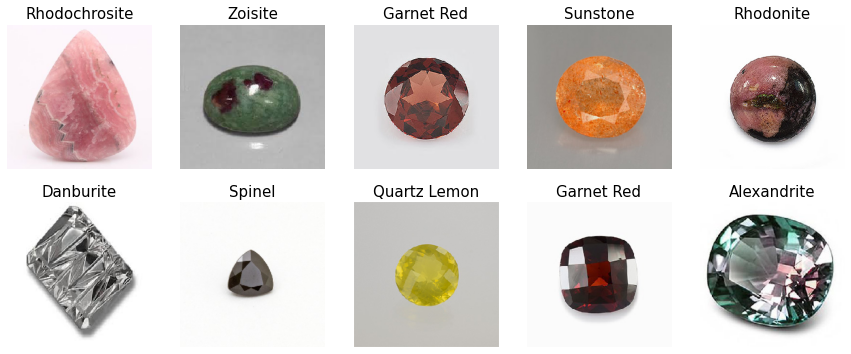

In [27]:
def plot_image(img):
    plt.imshow(img)
    plt.axis('off')

images, labels = sample_data[0]
sample_size = 10
plt.figure(figsize=(15,6))
for i in range(sample_size):
    class_id = np.argmax(labels[i])
    style_name = [key for key in class_indices if class_indices[key] == class_id][0]
    
    plt.subplot(2,5,i+1)
    plot_image(images[i])
    plt.title(style_name, fontsize=15)

In [40]:
temp_df = pd.DataFrame({'class': sample_data.classes}).value_counts().reset_index().sort_values(by='class')
#temp_df['class_name'] = 
temp_df.columns = ['class', 'counts']


Number of images:  2856


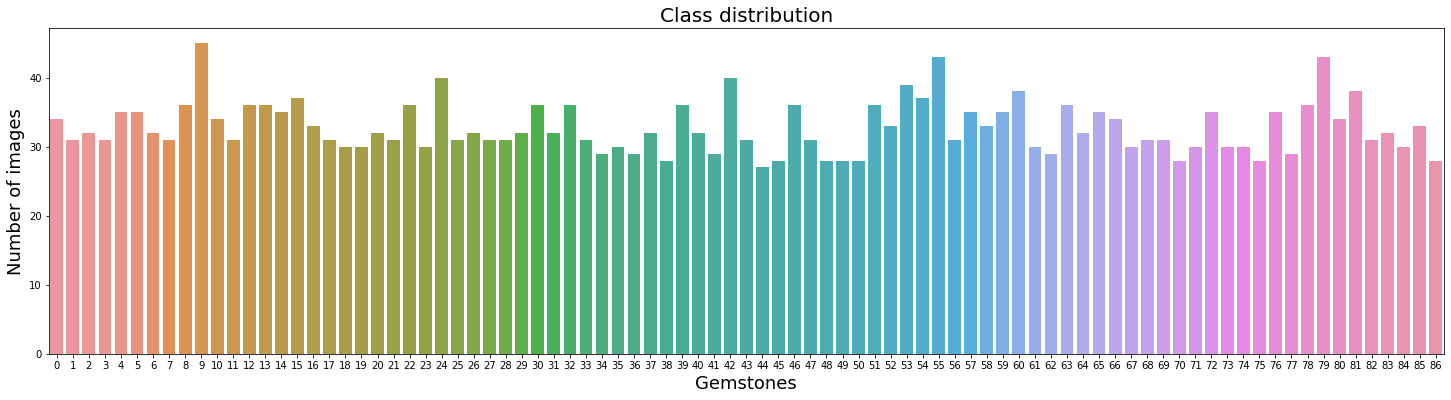

In [44]:
# how many images do we have per class?
plt.figure(figsize=(25,6))
sns.barplot(data=temp_df,
            x='class',
            y='counts')
plt.ylabel('Number of images', fontsize=18)
plt.xlabel('Gemstones', fontsize=18)
plt.title('Class distribution', fontsize=20)

print('Number of images: ', np.sum(temp_df['counts'].values))

## Set train and validation set

In [61]:
# set data augmentation techniques
image_gen_w_augmentation = ImageDataGenerator(rescale=1./255,
                               horizontal_flip=True,
                               vertical_flip=True,
                               rotation_range=90,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=0.2,
                              )

In [62]:
train_data = image_gen_w_augmentation.flow_from_directory(
    directory=os.path.join(data_dir,'train'),
    target_size=input_shape,
    color_mode='rgb', 
    classes=None,
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=True, 
    seed=seed,
    save_to_dir=None, 
    save_prefix='', 
    save_format='png',
    follow_links=False, 
    subset=None, 
    interpolation='nearest'
)

val_data = image_gen_w_augmentation.flow_from_directory(
    directory=os.path.join(data_dir,'test'),
    target_size=input_shape,
    color_mode='rgb', 
    classes=None,
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    seed=seed,
    save_to_dir=None, 
    save_prefix='', 
    save_format='png',
    follow_links=False, 
    subset=None, 
    interpolation='nearest'
)

Found 2856 images belonging to 87 classes.
Found 363 images belonging to 87 classes.


In [63]:
class_indices = train_data.class_indices
class_indices

#TODO: validate that the class indices between train and val data are the same

{'Alexandrite': 0,
 'Almandine': 1,
 'Amazonite': 2,
 'Amber': 3,
 'Amethyst': 4,
 'Ametrine': 5,
 'Andalusite': 6,
 'Andradite': 7,
 'Aquamarine': 8,
 'Aventurine Green': 9,
 'Aventurine Yellow': 10,
 'Benitoite': 11,
 'Beryl Golden': 12,
 'Bixbite': 13,
 'Bloodstone': 14,
 'Blue Lace Agate': 15,
 'Carnelian': 16,
 'Cats Eye': 17,
 'Chalcedony': 18,
 'Chalcedony Blue': 19,
 'Chrome Diopside': 20,
 'Chrysoberyl': 21,
 'Chrysocolla': 22,
 'Chrysoprase': 23,
 'Citrine': 24,
 'Coral': 25,
 'Danburite': 26,
 'Diamond': 27,
 'Diaspore': 28,
 'Dumortierite': 29,
 'Emerald': 30,
 'Fluorite': 31,
 'Garnet Red': 32,
 'Goshenite': 33,
 'Grossular': 34,
 'Hessonite': 35,
 'Hiddenite': 36,
 'Iolite': 37,
 'Jade': 38,
 'Jasper': 39,
 'Kunzite': 40,
 'Kyanite': 41,
 'Labradorite': 42,
 'Lapis Lazuli': 43,
 'Larimar': 44,
 'Malachite': 45,
 'Moonstone': 46,
 'Morganite': 47,
 'Onyx Black': 48,
 'Onyx Green': 49,
 'Onyx Red': 50,
 'Opal': 51,
 'Pearl': 52,
 'Peridot': 53,
 'Prehnite': 54,
 'Pyrite': 5

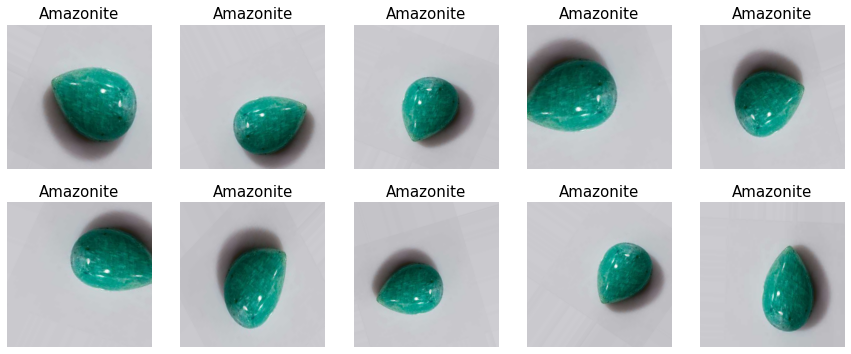

In [95]:
# take a look to an augmented image 
sample_size = 10
plt.figure(figsize=(15,6))
for i in range(sample_size):
    images, labels = train_data[0]
    class_id = np.argmax(labels[0])
    style_name = [key for key in class_indices if class_indices[key] == class_id][0]
    
    plt.subplot(2,5,i+1)
    plot_image(images[0])
    plt.title(style_name, fontsize=15)

# Model

In [73]:
def Resblock2D_v2(x, kernel_size, out_filters, strides, dilation_rate, elu_alpha):
    fx = tf.keras.layers.BatchNormalization()(x)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Conv2D(out_filters, kernel_size, strides=strides, padding='same', dilation_rate=dilation_rate)(fx)
    fx = tf.keras.layers.BatchNormalization()(fx)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Conv2D(out_filters, kernel_size, strides=strides, padding='same', dilation_rate=dilation_rate)(fx)
    out = tf.keras.layers.Add()([x,fx])
    return out

def Resblock1D_v2(x, n_units, elu_alpha):
    fx = tf.keras.layers.BatchNormalization()(x)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Dense(n_units)(fx)
    fx = tf.keras.layers.BatchNormalization()(fx)
    fx = tf.keras.layers.ELU(alpha=elu_alpha)(fx)
    fx = tf.keras.layers.Dense(n_units)(fx)
    out = tf.keras.layers.Add()([x,fx])
    return out

def Custom_model(input_shape, n_classes, elu_alpha):
    
    input_layer = tf.keras.layers.Input(shape=input_shape)
    
    conv_layers = [32, 64, 128]
    for i, conv_layer in enumerate(conv_layers):
        # Block to increase dims
        if i == 0:
            x = tf.keras.layers.Conv2D(conv_layer, (3,3), padding='same', input_shape=input_shape)(input_layer)
        else:
            x = tf.keras.layers.Conv2D(conv_layer, (3,3), padding='same', input_shape=input_shape)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ELU(alpha=elu_alpha)(x)
        # Residual Block
        x = Resblock2D_v2(x, kernel_size=(3,3), out_filters=conv_layer, strides=(1,1), dilation_rate=(1,1), elu_alpha=elu_alpha)
        x = tf.keras.layers.MaxPooling2D((2,2), strides=(2,2))(x)
    
    # Prediction layers
    #x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    #x = tf.keras.layers.Flatten()(x)
    
    dense_layers = [128]
    for dense_layer in dense_layers:
        # Dense layer to increase or decrease dims
        x = tf.keras.layers.Dense(dense_layer)(x)
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.ELU(alpha=elu_alpha)(x)
        # Residual block
        x = Resblock1D_v2(x, n_units=dense_layer, elu_alpha=elu_alpha)
    
    # Output layer
    x = tf.keras.layers.Dense(n_classes)(x)
    
    return tf.keras.Model(inputs=input_layer, outputs=x, name='Custom_model')

In [86]:
model = Custom_model(list(input_shape)+[3], n_classes, elu_alpha)

In [87]:
model.summary()

Model: "Custom_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
elu (ELU)                       (None, 256, 256, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [88]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

# Set callbacks to save best model and early stopping

In [89]:
callbacks = []

# Save best model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(base_dir, 'Model'),
    monitor='val_loss',
    verbose=0, 
    save_best_only=True,
    save_weights_only=False, 
    mode='min', 
    save_freq='epoch'
)
callbacks.append(checkpoint_cb)

# Early stopping
earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0, 
    patience=20, 
    verbose=0,
    mode='min'
)
callbacks.append(earlystopping_cb)

In [90]:
epochs=100
history = model.fit(
    train_data,
    steps_per_epoch=int(np.ceil(train_data.n / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data,
    validation_steps=int(np.ceil(val_data.n / float(BATCH_SIZE))),
    callbacks=callbacks
)

Epoch 1/100
179/179 [==============================] - 55s 281ms/step - loss: 3.6746 - accuracy: 0.0966 - val_loss: 5.0993 - val_accuracy: 0.0496
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
179/179 [==============================] - 48s 265ms/step - loss: 2.9831 - accuracy: 0.1877 - val_loss: 4.1646 - val_accuracy: 0.0882
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 3/100
179/179 [==============================] - 47s 261ms/step - loss: 2.7324 - accuracy: 0.2342 - val_loss: 3.9322 - val_accuracy: 0.1873
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 4/100
179/179 [==============================] - 48s 267ms/step - loss: 2.5868 - accuracy: 0.2672 - val_loss: 2.7122 - val_accuracy: 0.2755
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 5/100
179/179 [==============================] - 48s 266ms/step - loss: 2.4879 - accuracy: 0.2787 - val_loss: 4.2790 - val_accuracy: 0.1460
Epoch 6/100
179/179 [==============================] - 47s 262ms/step - loss: 2.3624 - accuracy: 0.2987 - val_loss: 2.9167 - val_accuracy: 0.2287
Epoch 7/100
179/179 [==============================] - 47s 263ms/step - loss: 2.3186 - accuracy: 0.3106 - val_loss: 3.6638 - val_accuracy: 0.1653
Epoch 8/100
179/179 [==============================] - 47s 264ms/step - loss: 2.2178 - accuracy: 0.3550 - val_loss: 2.6169 - val_accuracy: 0.2700
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 9/100
179/179 [==============================] - 47s 260ms/step - loss: 2.0707 - accuracy: 0.3638 - val_loss: 2.6646 - val_accuracy: 0.3058
Epoch 10/100
179/179 [==============================] - 47s 263ms/step - loss: 2.0215 - accuracy: 0.3803 - val_loss: 2.4985 - val_accuracy: 0.3526
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 11/100
179/179 [==============================] - 49s 273ms/step - loss: 1.9331 - accuracy: 0.4048 - val_loss: 2.8035 - val_accuracy: 0.3499
Epoch 12/100
179/179 [==============================] - 48s 266ms/step - loss: 1.8761 - accuracy: 0.4314 - val_loss: 1.9297 - val_accuracy: 0.4325
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 13/100
179/179 [==============================] - 47s 262ms/step - loss: 1.8093 - accuracy: 0.4265 - val_loss: 2.0653 - val_accuracy: 0.4022
Epoch 14/100
179/179 [==============================] - 47s 263ms/step - loss: 1.7285 - accuracy: 0.4671 - val_loss: 2.2698 - val_accuracy: 0.3719
Epoch 15/100
179/179 [==============================] - 47s 264ms/step - loss: 1.7126 - accuracy: 0.4601 - val_loss: 2.7030 - val_accuracy: 0.3085
Epoch 16/100
179/179 [==============================] - 47s 264ms/step - loss: 1.7208 - accuracy: 0.4590 - val_loss: 1.9894 - val_accuracy: 0.4380
Epoch 17/100
179/179 [==============================] - 48s 265ms/step - loss: 1.6338 - accuracy: 0.4821 - val_loss: 1.8054 - val_accuracy: 0.4435
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 18/100
179/179 [==============================] - 47s 262ms/step - loss: 1.5691 - accuracy: 0.5070 - val_loss: 1.7271 - val_accuracy: 0.4601
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 19/100
179/179 [==============================] - 47s 259ms/step - loss: 1.6097 - accuracy: 0.4965 - val_loss: 2.4521 - val_accuracy: 0.3747
Epoch 20/100
179/179 [==============================] - 47s 259ms/step - loss: 1.5133 - accuracy: 0.5214 - val_loss: 1.6104 - val_accuracy: 0.5152
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 21/100
179/179 [==============================] - 47s 261ms/step - loss: 1.5175 - accuracy: 0.5242 - val_loss: 1.6784 - val_accuracy: 0.4931
Epoch 22/100
179/179 [==============================] - 47s 263ms/step - loss: 1.4834 - accuracy: 0.5252 - val_loss: 1.5568 - val_accuracy: 0.5234
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 23/100
179/179 [==============================] - 47s 262ms/step - loss: 1.4674 - accuracy: 0.5235 - val_loss: 1.5644 - val_accuracy: 0.5234
Epoch 24/100
179/179 [==============================] - 47s 263ms/step - loss: 1.4071 - accuracy: 0.5382 - val_loss: 1.5871 - val_accuracy: 0.5014
Epoch 25/100
179/179 [==============================] - 47s 263ms/step - loss: 1.3919 - accuracy: 0.5490 - val_loss: 1.4992 - val_accuracy: 0.5510
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 26/100
179/179 [==============================] - 47s 262ms/step - loss: 1.3350 - accuracy: 0.5658 - val_loss: 1.8344 - val_accuracy: 0.4628
Epoch 27/100
179/179 [==============================] - 47s 263ms/step - loss: 1.3636 - accuracy: 0.5539 - val_loss: 1.6821 - val_accuracy: 0.4986
Epoch 28/100
179/179 [==============================] - 47s 264ms/step - loss: 1.3393 - accuracy: 0.5648 - val_loss: 1.5716 - val_accuracy: 0.5262
Epoch 29/100
179/179 [==============================] - 47s 264ms/step - loss: 1.2807 - accuracy: 0.5725 - val_loss: 1.6957 - val_accuracy: 0.5041
Epoch 30/100
179/179 [==============================] - 48s 265ms/step - loss: 1.3239 - accuracy: 0.5791 - val_loss: 1.4626 - val_accuracy: 0.5565
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 31/100
179/179 [==============================] - 47s 261ms/step - loss: 1.2800 - accuracy: 0.5753 - val_loss: 1.7078 - val_accuracy: 0.5014
Epoch 32/100
179/179 [==============================] - 48s 265ms/step - loss: 1.2966 - accuracy: 0.5697 - val_loss: 1.9494 - val_accuracy: 0.4628
Epoch 33/100
179/179 [==============================] - 47s 263ms/step - loss: 1.2391 - accuracy: 0.5823 - val_loss: 1.3568 - val_accuracy: 0.5785
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 34/100
179/179 [==============================] - 47s 262ms/step - loss: 1.2459 - accuracy: 0.5903 - val_loss: 1.4609 - val_accuracy: 0.5592
Epoch 35/100
179/179 [==============================] - 47s 263ms/step - loss: 1.2034 - accuracy: 0.5886 - val_loss: 1.4764 - val_accuracy: 0.5537
Epoch 36/100
179/179 [==============================] - 47s 264ms/step - loss: 1.2246 - accuracy: 0.5889 - val_loss: 1.4482 - val_accuracy: 0.5895
Epoch 37/100
179/179 [==============================] - 48s 264ms/step - loss: 1.2230 - accuracy: 0.5949 - val_loss: 1.5152 - val_accuracy: 0.5399
Epoch 38/100
179/179 [==============================] - 48s 266ms/step - loss: 1.2341 - accuracy: 0.5942 - val_loss: 2.2440 - val_accuracy: 0.4270
Epoch 39/100
179/179 [==============================] - 47s 264ms/step - loss: 1.1875 - accuracy: 0.5963 - val_loss: 1.7339 - val_accuracy: 0.4931
Epoch 40/100
179/179 [==============================] - 48s 264ms/step - loss: 1.1264 - accuracy: 0.6246 - val_loss: 1

/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 44/100
179/179 [==============================] - 47s 259ms/step - loss: 1.1342 - accuracy: 0.6201 - val_loss: 1.3656 - val_accuracy: 0.5758
Epoch 45/100
179/179 [==============================] - 47s 259ms/step - loss: 1.1015 - accuracy: 0.6362 - val_loss: 1.7815 - val_accuracy: 0.5289
Epoch 46/100
179/179 [==============================] - 47s 261ms/step - loss: 1.1108 - accuracy: 0.6296 - val_loss: 1.5780 - val_accuracy: 0.5262
Epoch 47/100
179/179 [==============================] - 48s 265ms/step - loss: 1.0928 - accuracy: 0.6303 - val_loss: 1.5496 - val_accuracy: 0.5289
Epoch 48/100
179/179 [==============================] - 48s 265ms/step - loss: 1.0926 - accuracy: 0.6310 - val_loss: 1.5394 - val_accuracy: 0.5262
Epoch 49/100
179/179 [==============================] - 48s 266ms/step - loss: 1.0664 - accuracy: 0.6320 - val_loss: 1.2629 - val_accuracy: 0.5840
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 50/100
179/179 [==============================] - 47s 263ms/step - loss: 1.0719 - accuracy: 0.6310 - val_loss: 1.3214 - val_accuracy: 0.6143
Epoch 51/100
179/179 [==============================] - 47s 263ms/step - loss: 1.0655 - accuracy: 0.6289 - val_loss: 2.1680 - val_accuracy: 0.4821
Epoch 52/100
179/179 [==============================] - 47s 264ms/step - loss: 1.0663 - accuracy: 0.6390 - val_loss: 1.3208 - val_accuracy: 0.5785
Epoch 53/100
179/179 [==============================] - 48s 265ms/step - loss: 1.0354 - accuracy: 0.6432 - val_loss: 2.0433 - val_accuracy: 0.4463
Epoch 54/100
179/179 [==============================] - 48s 265ms/step - loss: 1.0889 - accuracy: 0.6296 - val_loss: 1.4675 - val_accuracy: 0.5372
Epoch 55/100
179/179 [==============================] - 48s 265ms/step - loss: 1.0209 - accuracy: 0.6506 - val_loss: 1.2665 - val_accuracy: 0.6033
Epoch 56/100
179/179 [==============================] - 48s 266ms/step - loss: 1.0411 - accuracy: 0.6502 - val_loss: 2

/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 61/100
179/179 [==============================] - 47s 259ms/step - loss: 0.9868 - accuracy: 0.6632 - val_loss: 1.2863 - val_accuracy: 0.5950
Epoch 62/100
179/179 [==============================] - 47s 260ms/step - loss: 0.9732 - accuracy: 0.6733 - val_loss: 1.5063 - val_accuracy: 0.5399
Epoch 63/100
179/179 [==============================] - 47s 259ms/step - loss: 0.9793 - accuracy: 0.6562 - val_loss: 1.6300 - val_accuracy: 0.5289
Epoch 64/100
179/179 [==============================] - 47s 259ms/step - loss: 0.9855 - accuracy: 0.6565 - val_loss: 1.3400 - val_accuracy: 0.5840
Epoch 65/100
179/179 [==============================] - 47s 260ms/step - loss: 0.9469 - accuracy: 0.6835 - val_loss: 1.3136 - val_accuracy: 0.6061
Epoch 66/100
179/179 [==============================] - 47s 259ms/step - loss: 0.9257 - accuracy: 0.6803 - val_loss: 1.2148 - val_accuracy: 0.6336
INFO:tensorflow:Assets written to: /home/lorena/Documents/Personal_projects/Gemstones/Model/assets


/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 67/100
179/179 [==============================] - 47s 259ms/step - loss: 0.9457 - accuracy: 0.6775 - val_loss: 1.2606 - val_accuracy: 0.6171
Epoch 68/100
179/179 [==============================] - 47s 260ms/step - loss: 0.9698 - accuracy: 0.6663 - val_loss: 1.3095 - val_accuracy: 0.6309
Epoch 69/100
179/179 [==============================] - 47s 259ms/step - loss: 0.9435 - accuracy: 0.6740 - val_loss: 1.2567 - val_accuracy: 0.6309
Epoch 70/100
179/179 [==============================] - 47s 260ms/step - loss: 0.9494 - accuracy: 0.6751 - val_loss: 1.7698 - val_accuracy: 0.5317
Epoch 71/100
179/179 [==============================] - 47s 259ms/step - loss: 0.9509 - accuracy: 0.6779 - val_loss: 1.3316 - val_accuracy: 0.6006
Epoch 72/100
179/179 [==============================] - 47s 260ms/step - loss: 0.9231 - accuracy: 0.6754 - val_loss: 2.6212 - val_accuracy: 0.4490
Epoch 73/100
179/179 [==============================] - 47s 260ms/step - loss: 0.9710 - accuracy: 0.6726 - val_loss: 1

/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 76/100
179/179 [==============================] - 47s 259ms/step - loss: 0.8874 - accuracy: 0.6884 - val_loss: 1.5331 - val_accuracy: 0.5372
Epoch 77/100
179/179 [==============================] - 47s 260ms/step - loss: 0.8821 - accuracy: 0.6856 - val_loss: 1.4373 - val_accuracy: 0.5923
Epoch 78/100
179/179 [==============================] - 47s 260ms/step - loss: 0.8990 - accuracy: 0.6877 - val_loss: 1.4748 - val_accuracy: 0.5455
Epoch 79/100
179/179 [==============================] - 47s 259ms/step - loss: 0.8887 - accuracy: 0.7052 - val_loss: 1.2869 - val_accuracy: 0.5868
Epoch 80/100
179/179 [==============================] - 46s 259ms/step - loss: 0.8846 - accuracy: 0.6961 - val_loss: 1.7250 - val_accuracy: 0.5758
Epoch 81/100
179/179 [==============================] - 46s 259ms/step - loss: 0.8699 - accuracy: 0.6870 - val_loss: 1.5944 - val_accuracy: 0.5399
Epoch 82/100
179/179 [==============================] - 48s 269ms/step - loss: 0.9176 - accuracy: 0.6933 - val_loss: 1

/home/lorena/anaconda3/envs/architecture_env/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 85/100
179/179 [==============================] - 47s 263ms/step - loss: 0.8713 - accuracy: 0.6929 - val_loss: 1.3811 - val_accuracy: 0.6116
Epoch 86/100
179/179 [==============================] - 47s 263ms/step - loss: 0.8845 - accuracy: 0.6968 - val_loss: 1.1876 - val_accuracy: 0.6309
Epoch 87/100
179/179 [==============================] - 47s 263ms/step - loss: 0.8581 - accuracy: 0.6996 - val_loss: 1.2046 - val_accuracy: 0.6639
Epoch 88/100
179/179 [==============================] - 47s 264ms/step - loss: 0.8246 - accuracy: 0.7209 - val_loss: 1.2856 - val_accuracy: 0.6143
Epoch 89/100
179/179 [==============================] - 48s 265ms/step - loss: 0.8121 - accuracy: 0.7027 - val_loss: 1.1696 - val_accuracy: 0.6446
Epoch 90/100
179/179 [==============================] - 48s 266ms/step - loss: 0.8190 - accuracy: 0.7181 - val_loss: 1.4744 - val_accuracy: 0.5592
Epoch 91/100
179/179 [==============================] - 48s 267ms/step - loss: 0.8443 - accuracy: 0.7083 - val_loss: 1

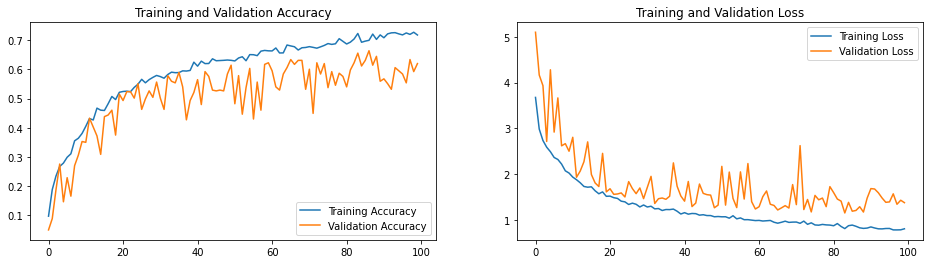

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [206]:
val_data = image_gen.flow_from_directory(
    directory=os.path.join(data_dir,'test'),
    target_size=input_shape,
    color_mode='rgb', 
    classes=None,
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    seed=seed,
    save_to_dir=None, 
    save_prefix='', 
    save_format='png',
    follow_links=False, 
    subset=None, 
    interpolation='nearest'
)

Found 363 images belonging to 87 classes.


In [207]:
n_batches = int(np.ceil(val_data.n/BATCH_SIZE))
classes_df = pd.DataFrame()

for batch in np.arange(n_batches):
    classes = np.argmax(val_data[batch][1], axis=1)
    temp_df = pd.DataFrame(classes)
    classes_df = classes_df.append(temp_df, ignore_index=True)
classes_df.columns = ['true_class']

#logits and probs
val_logits = model.predict(val_data)
val_probs = tf.keras.activations.softmax(tf.constant(val_logits)).numpy()


classes_df['predicted_class'] = np.argmax(val_probs, axis=1)

In [208]:
confusion_matrix = confusion_matrix(classes_df.true_class.values, 
                                    classes_df.predicted_class.values, 
                                    labels=np.arange(87))

confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)

TypeError: 'numpy.ndarray' object is not callable

In [209]:
confusion_matrix_norm

array([[0.75, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.5 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.5 , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

<AxesSubplot:>

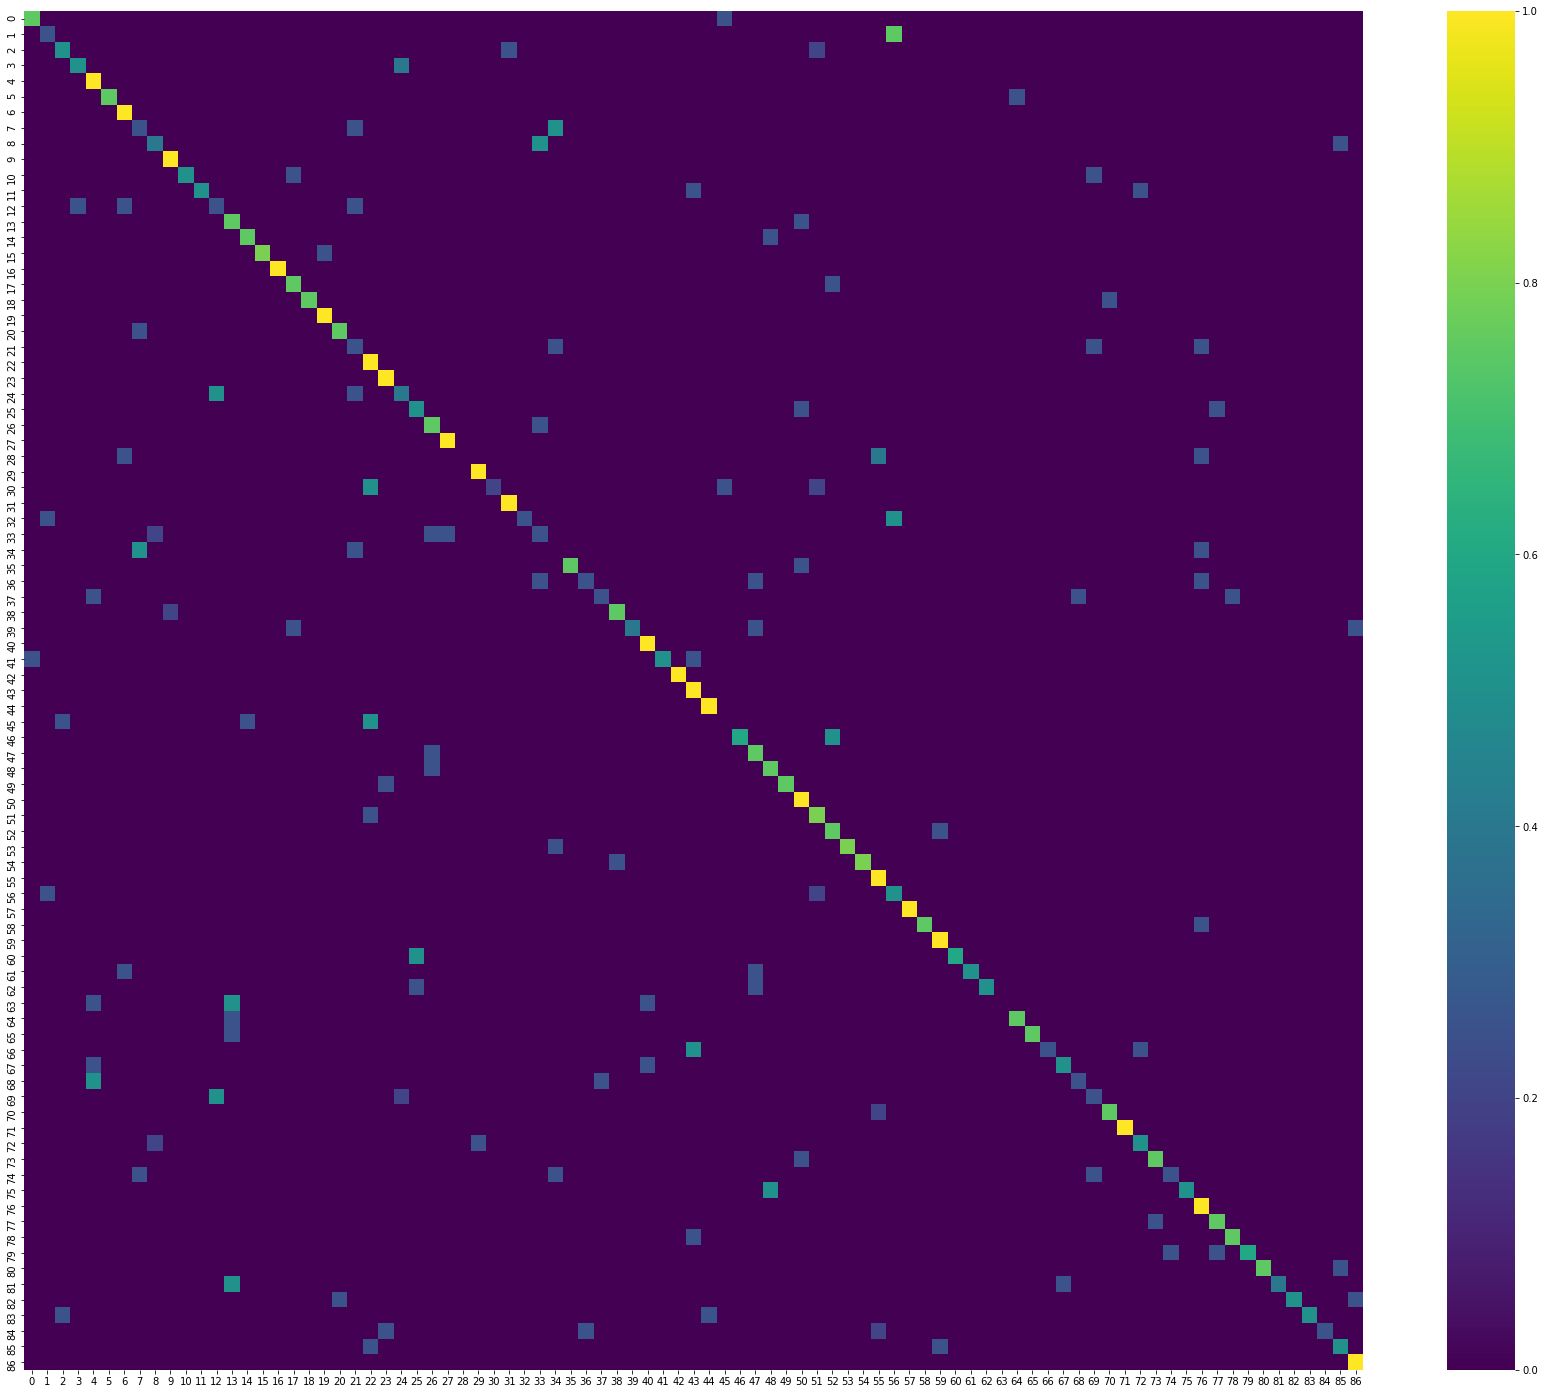

In [210]:
plt.figure(figsize=(30,25))
sns.heatmap(confusion_matrix_norm, cmap='viridis')

In [190]:
train_data = image_gen.flow_from_directory(
    directory=os.path.join(data_dir,'train'),
    target_size=input_shape,
    color_mode='rgb', 
    classes=None,
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    seed=seed,
    save_to_dir=None, 
    save_prefix='', 
    save_format='png',
    follow_links=False, 
    subset=None, 
    interpolation='nearest'
)

Found 2856 images belonging to 87 classes.


In [191]:
n_batches = int(np.ceil(train_data.n/BATCH_SIZE))
classes_df = pd.DataFrame()

for batch in np.arange(n_batches):
    classes = np.argmax(train_data[batch][1], axis=1)
    temp_df = pd.DataFrame(classes)
    classes_df = classes_df.append(temp_df, ignore_index=True)
classes_df.columns = ['true_class']

#logits and probs
train_logits = model.predict(train_data)
train_probs = tf.keras.activations.softmax(tf.constant(train_logits)).numpy()


classes_df['predicted_class'] = np.argmax(train_probs, axis=1)

In [193]:
classes_df

,true_class,predicted_class
0,0,31
1,0,0
2,0,0
3,0,31
4,0,0
...,...,...
2851,86,86
2852,86,86
2853,86,86
2854,86,86


In [200]:
classes_df.true_class.values.shape

(2856,)

In [199]:
classes_df.predicted_class.values.shape

(2856,)

In [205]:
confusion_matrix = confusion_matrix(classes_df['true_class'], 
                                    classes_df['predicted_class'], 
                                    labels=np.arange(87))

#confusion_matrix_norm = confusion_matrix / confusion_matrix.sum(axis=1)

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
diag = np.diag(A)

<AxesSubplot:>

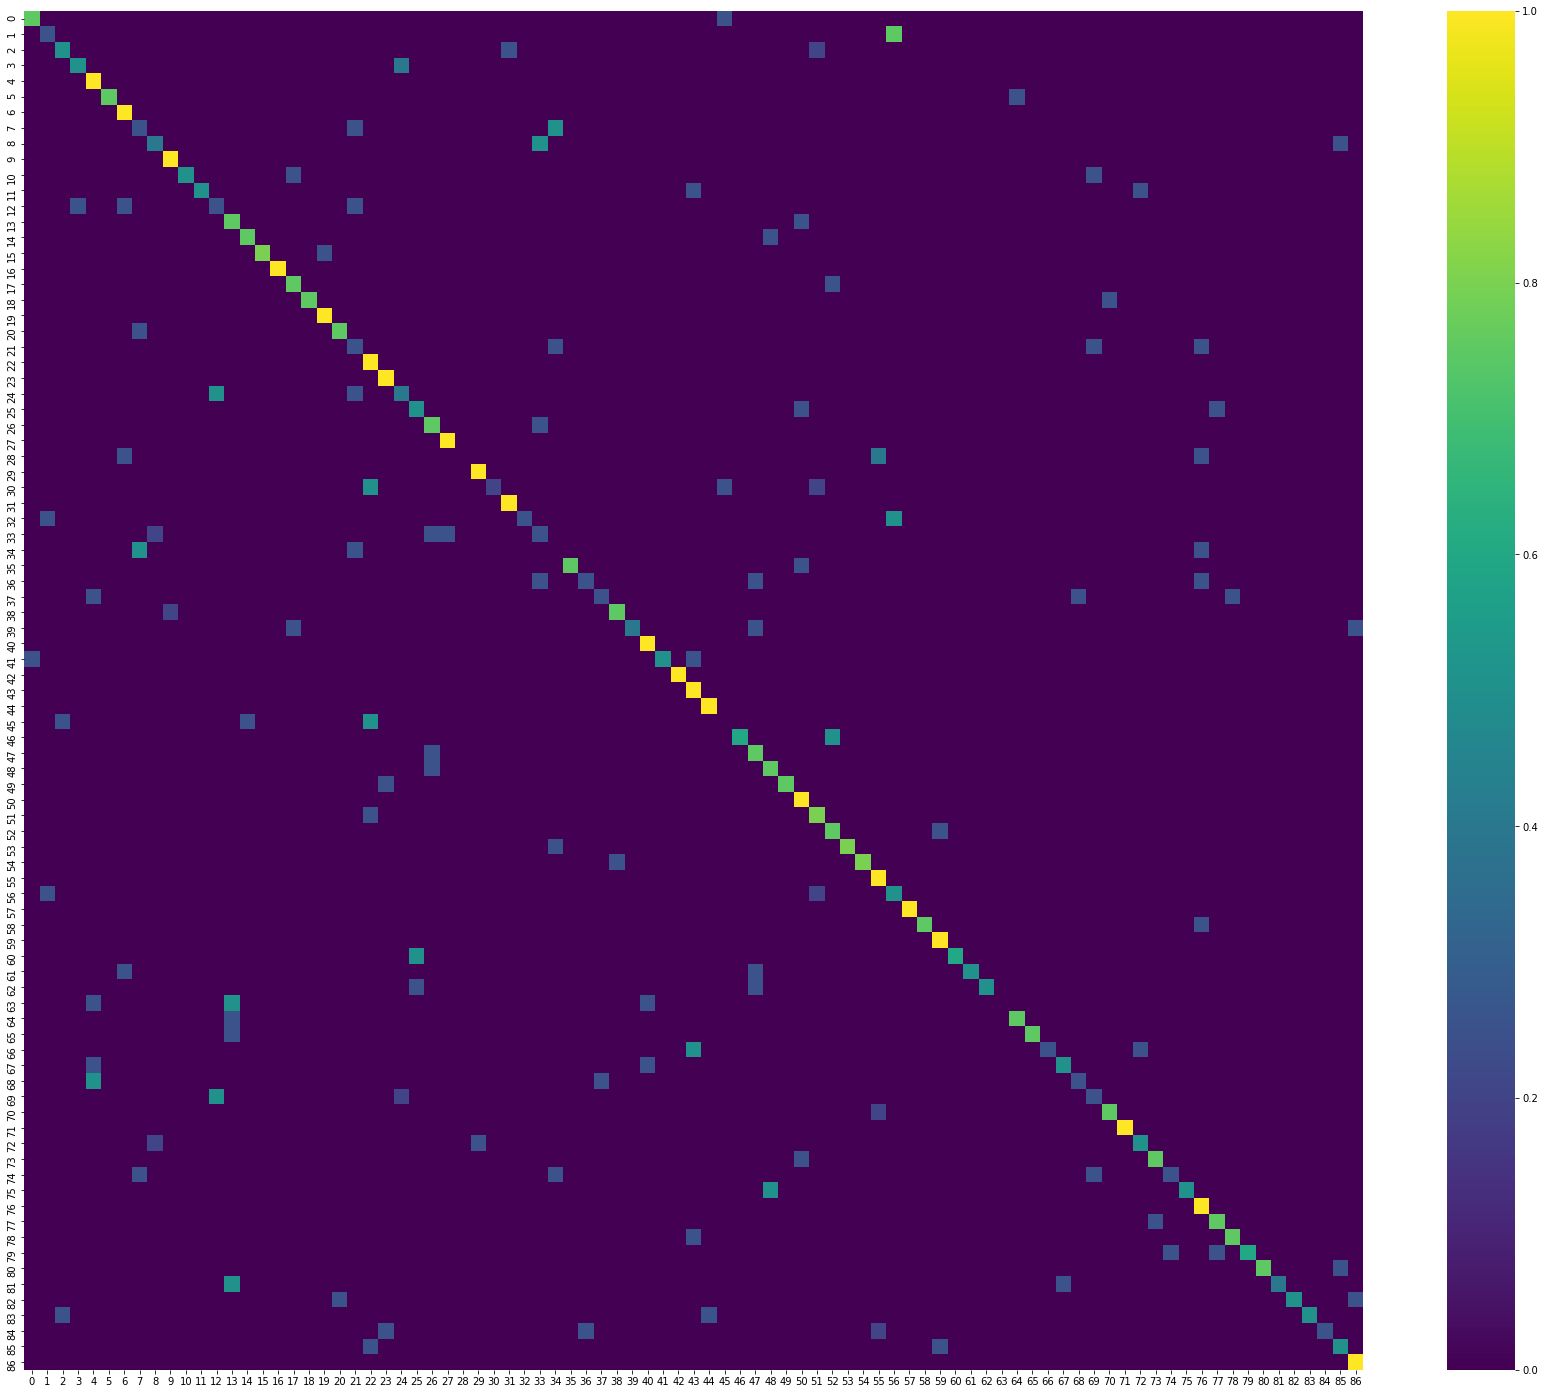

In [188]:
plt.figure(figsize=(30,25))
sns.heatmap(confusion_matrix_norm, cmap='viridis')

In [117]:
val_data[0]

(16, 256, 256, 3)

In [113]:
np.argmax(val_probs, axis=1)

array([ 0,  0, 45,  0, 56,  1, 56, 56, 51,  2,  2, 31,  3, 24, 24,  3,  4,
        4,  4,  4,  5,  5,  5, 64,  6,  6,  6,  6,  7, 34, 34, 21, 85, 33,
        8, 33,  8,  9,  9,  9,  9,  9, 69, 10, 17, 10, 72, 11, 11, 43, 21,
        3, 12,  6, 13, 13, 13, 50, 14, 14, 14, 48, 15, 15, 19, 15, 15, 16,
       16, 16, 16, 17, 17, 17, 52, 70, 18, 18, 18, 19, 19, 19, 19, 20, 20,
        7, 20, 34, 69, 21, 76, 22, 22, 22, 22, 23, 23, 23, 23, 21, 24, 12,
       12, 24, 25, 25, 77, 50, 26, 26, 33, 26, 27, 27, 27, 27, 55,  6, 76,
       55, 29, 29, 29, 29, 51, 22, 30, 45, 22, 31, 31, 31, 31,  1, 56, 56,
       32, 26, 33,  8, 27, 21,  7,  7, 76, 35, 35, 35, 50, 76, 36, 47, 33,
       68, 37,  4, 78, 38, 38, 38,  9, 39, 17, 39, 86, 47, 40, 40, 40, 40,
       41,  0, 41, 43, 42, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44,
       22,  2, 22, 14, 52, 52, 46, 46, 46, 47, 47, 47, 26, 26, 48, 48, 48,
       49, 23, 49, 49, 50, 50, 50, 50, 51, 22, 51, 51, 51, 52, 52, 59, 52,
       53, 34, 53, 53, 53